## **PyTorch Neural Network Classification**

In [1]:
%pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 841.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [2]:


import torch
from torch import nn
import matplotlib.pyplot as plt

# let's see the pytorch version
torch.__version__



'2.6.0+cu124'

A classificiation problem involves predicting whether something is one thing or the another.

### **Architecture of a classification neural network**

| **Hyperparameter**           | **Binary Classification**                                                                                   | **Multiclass Classification**                                                          |
|-----------------------------|-------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------|
| **Input layer shape**<br>`(in_features)` | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification                                                          |
| **Hidden layer(s)**         | Problem specific, minimum = 1, maximum = unlimited                                                          | Same as binary classification                                                          |
| **Neurons per hidden layer**| Problem specific, generally 10 to 512                                                                        | Same as binary classification                                                          |
| **Output layer shape**<br>`(out_features)` | 1 (one class or the other)                                                                               | 1 per class (e.g. 3 for food, person or dog photo)                                     |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) (rectified linear unit) but can be many others | Same as binary classification                                                          |
| **Output activation**       | Sigmoid (`torch.sigmoid` in PyTorch)                                                                        | Softmax (`torch.softmax` in PyTorch)                                                  |
| **Loss function**           | Binary crossentropy (`torch.nn.BCELoss` in PyTorch)                                                         | Cross entropy (`torch.nn.CrossEntropyLoss` in PyTorch)                                |
| **Optimizer**               | SGD (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/optim.html) (see `torch.optim` for more options) | Same as binary classification                                                          |


### **Make classification data and get it ready**

We will make use of the `make_circles()` method from scikit-learn to generate two circles with different colored dots.

In [3]:
from sklearn.datasets import make_circles

# let make 10000 samples
n_samples = 10000

# now let's make the circles
X,y = make_circles(n_samples, noise = 0.01 , random_state=135)

In [4]:
# let's see the data
print(f"First 10 samples of X: {X[:10]}")
print(f"First 10 samples of y: {y[:10]}")

First 10 samples of X: [[-0.84485779 -0.55861737]
 [-0.39957934  0.91574009]
 [-0.62216013 -0.51764318]
 [-0.54048279  0.83403373]
 [ 0.90793086 -0.39924234]
 [ 0.04514428  0.792493  ]
 [ 0.77522222 -0.21804669]
 [ 0.37203663 -0.92007161]
 [ 0.42370866 -0.92106958]
 [-0.3291022  -0.96949903]]
First 10 samples of y: [0 0 1 0 0 1 1 0 0 0]


In [5]:
# we can also see in tables
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label":y})
circles.head(10)

,X1,X2,label
0,-0.844858,-0.558617,0
1,-0.399579,0.915740,0
2,-0.622160,-0.517643,1
3,-0.540483,0.834034,0
4,0.907931,-0.399242,0
5,0.045144,0.792493,1
6,0.775222,-0.218047,1
7,0.372037,-0.920072,0
8,0.423709,-0.921070,0
9,-0.329102,-0.969499,0


So the problem is a binary classification, either 0 or 1. Let's see how many values are there for each class

In [6]:
print(f"There are {circles.label.value_counts()}")


There are label
0    5000
1    5000
Name: count, dtype: int64


Visualize them

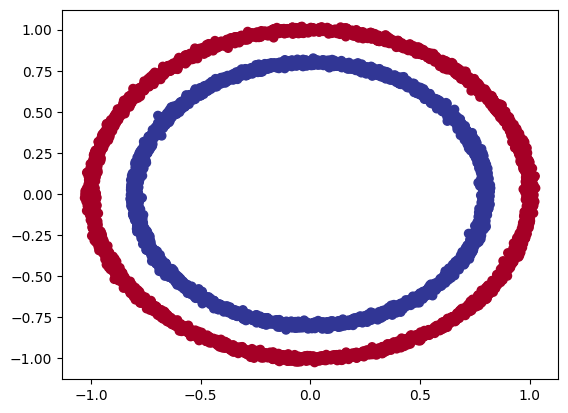

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

As you can see, a linear classifier cannot work on data like this.

#### Input and Output Shapes

As we discussed in the previous tutorials as well, the most common error is the shape error, since alot of matrix and tensor multiplication is happening, we have to keep the dimensions in check.

Make a habit of familiarizing yourself with the dimensions of the data you are dealing with

In [8]:
print(f"Shape of the X: {X.shape}")
print(f"Shape of the y: {y.shape}")

Shape of the X: (10000, 2)
Shape of the y: (10000,)


so we have `10,000` of `x` and `10,000` of `y`. But the second dimension of `x` is `2`, while for `y` is `1`

In [9]:
X_sample = X[0]
y_sample = y[0]

print(f"Value of one sample of X: {X_sample} with shape: {X_sample.shape} ")
print(f"Value of one sample of y: {y_sample} with shape: {y_sample.shape} ")



Value of one sample of X: [-0.84485779 -0.55861737] with shape: (2,) 
Value of one sample of y: 0 with shape: () 


so `x` has two vectors (features) whereas `y` has a single feature, and is a scalar.

#### Turn data into tensors, and create test-train split

Since we want it to run on PyTorch, we have to convert our data into `tensors`, currently it's `numpy.array`, and then we have to split our data into training and testing set, to get it started

In [10]:
# make the data into tensors

# data type before

print(f"Type of X (before): {X.dtype}")
print(f"Type of y (before): {y.dtype}")


X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)




# type of data
print(f"Type of X (after): {X.type()}")
print(f"Type of y (after): {y.type()}")

Type of X (before): float64
Type of y (before): int64
Type of X (after): torch.FloatTensor
Type of y (after): torch.FloatTensor


Now, do the test-train split

In [11]:
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=135)


# let's print the size now
print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_test: {len(y_test)}")

Length of X_train: 8000
Length of X_test: 2000
Length of y_train: 8000
Length of y_test: 2000


So we have `8000` training samples and `2000` testing samples

### **Building a model**

Few practices that are nice to do, is setting up an device agnostic code, so that if we have `cuda` or `mlx` or plain old `cpu`, it works smoothly as ever.


We will:

1. Construct the model by subclassing `nn.Module`
2. Define the loss function and optimizer
3. Create the training loop

In [12]:
from torch import nn

# make it device agnostic, for cuda, apple silicon and cpu
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
device

'cuda'

Let's create a model class that:

1. Subclasses `nn.Module`
2. Creates 2 `nn.Linear` layers in the constructor capable of handling the input and the output shapes of `X` and `y`.
3. Defines a `forward()` method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target `device`.

In [13]:
class CircleModelv0(nn.Module):
  def __init__(self):
    super().__init__()

    # now lets make 2 nn.linear layers
    self.layer1 = nn.Linear(in_features=2, # since the x value has two vectors
                            out_features=8 # this we can set, since this is the input to the hidden layer
                            )
    self.layer2 = nn.Linear(in_features=8, # since the output of the previous layer is 5
                            out_features=1 # its a binary classification, so 0 or 1 hence binary
                            )

    # a forward method

  def forward(self,x):
    # we will take on the output of layer 2, which will take the output of layer 1
    return self.layer_2(self.layer_1(x))


# now instantiate the model with the target device

model_0 = CircleModelv0().to(device)
model_0

CircleModelv0(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=1, bias=True)
)

The thing that is happening between layer 1 and layer 2, where the `in_features=8`, is the one where we have 8 hidden neurons. So this layer, basically turns the input data with 2 features into 8 features, which allow model to learn patterns from 8 numbers rather than just 2 numbers, potentially improving the performance. (sometimes it doesn't work)


The number of hidden neurons you can use is a `hyperparameter`

this same thing can be done using `nn.Sequential`

In [14]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=8),
    nn.Linear(in_features=8, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

It is simpler to write, but it always happen sequentially, so if we want something else to happen, instead of calculations happening just straight forward, we want to define our own custom `nn.Module` subclass

In [15]:
# let's feed some data through the model

untrained_model_preds = model_0(X_test.to(device))

print(f"Untrained model predictions: {untrained_model_preds[:10]}")

print(f"Length of Predictions: {len(untrained_model_preds)} \n Shape of Predictions: {untrained_model_preds.shape}")
print(f"Length of test labels: {len(y_test)} \n Shape of test labels: {y_test.shape}")

print(f"First 10 test labels: {y_test[:10]}")

Untrained model predictions: tensor([[0.2062],
        [0.4410],
        [0.2026],
        [0.2276],
        [0.4430],
        [0.4741],
        [0.4205],
        [0.3388],
        [0.4056],
        [0.4399]], device='cuda:0', grad_fn=<SliceBackward0>)
Length of Predictions: 2000 
 Shape of Predictions: torch.Size([2000, 1])
Length of test labels: 2000 
 Shape of test labels: torch.Size([2000])
First 10 test labels: tensor([0., 1., 0., 1., 1., 0., 1., 1., 1., 0.])


#### Loss Function and Optimizer

As we did in the previous tutorial, we will also setup a lloss function here, but it will be a different one, different problems require different loss function, like mean squared error for regression problem, for a binary problem we can use binary cross entropy.


---

However, we can make use of the same optimizer function across different problem spaces.

| **Loss function/Optimizer**                        | **Problem type**                                   | **PyTorch Code**                                                  |
|----------------------------------------------------|----------------------------------------------------|-------------------------------------------------------------------|
| Stochastic Gradient Descent (SGD) optimizer        | Classification, regression, many others.           | `torch.optim.SGD()`                                              |
| Adam Optimizer                                     | Classification, regression, many others.           | `torch.optim.Adam()`                                             |
| Binary cross entropy loss                          | Binary classification                              | `torch.nn.BCELossWithLogits` or `torch.nn.BCELoss`              |
| Cross entropy loss                                 | Multi-class classification                         | `torch.nn.CrossEntropyLoss`                                      |
| Mean absolute error (MAE) or L1 Loss               | Regression                                         | `torch.nn.L1Loss`                                                |
| Mean squared error (MSE) or L2 Loss                | Regression                                         | `torch.nn.MSELoss`                                               |


Here we will make use of **binary cross entropy** loss function. PyTorch has two implementations of it:

1. `torch.nn.BCELoss()` - Creates a loss function that measures the binary cross entropy between target and input

2. `torch.nn.BCEWithLogitsLoss()` - It's the same except it has a sigmoid layer (`nn.sigmoid`) built-in

In [16]:
# making the loss function
loss_func = nn.BCEWithLogitsLoss()

# and the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

We also need an **Evaluation Metric**, some thing tha tell us how well our model is learning, if a loss function measures how *wrong* our model is, the evaluation metric will tell us how *right* it is.

Evaluation metric also offers a fidderent perspective, we will make use of accuracy. It can be measured by dividing the total number of correct predictions over the total number of predicitons.

In [17]:
def accuracy_func(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

### **Training the Model**

1. Forward Pass : The model goes through all the training data once, performing its `forward()` function calculations `model(x_train)`

2. Calculate the Loss : The model's output are compared to the ground truth and evaluated to see how wrong they are `loss = loss_func(y_pred, y_train)`

3. Zero gradients : The optimizers gradients are set to zero, so they can ve recalculated for the specific training step `optimizer.zero_grad()`

4. Perform backpropagation on the loss : Compute the gradient of the loss with respect for every model parameter to be updated (`requires_grad=True`). This is know as **backpropagation** hence backwards `loss.backwards()`

5. Optimizer : Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them

Let's pass the model some data

In [18]:
y_logits = model_0(X_test.to(device))[:10]

In [19]:
y_logits

tensor([[0.2062],
        [0.4410],
        [0.2026],
        [0.2276],
        [0.4430],
        [0.4741],
        [0.4205],
        [0.3388],
        [0.4056],
        [0.4399]], device='cuda:0', grad_fn=<SliceBackward0>)

Since the model is not trained yet, all these outputs are basically random. They are

$$ y = x \cdot \text{Weights}^T + \text{bias} $$

, since we have two layers of `nn.Linear()`.

But these numbers are hard to interpret, and we like our numbers to be comparable to our truth labels, so we use `sigmoid`

In [20]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5514],
        [0.6085],
        [0.5505],
        [0.5566],
        [0.6090],
        [0.6164],
        [0.6036],
        [0.5839],
        [0.6000],
        [0.6082]], device='cuda:0', grad_fn=<SigmoidBackward0>)

Although they are still random, they are now in the form of **prediciton probabilities**, so if `y_pred_probs` >= 0.5, `y=1` and vice versa

In [21]:
y_preds = torch.round(y_pred_probs)


y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:10]))

# now check for equality

print(f"Are they the same {y_preds == y_pred_labels}")

print(y_preds.squeeze())


Are they the same tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0',
       grad_fn=<SqueezeBackward0>)


In [22]:
y_test[:10]

tensor([0., 1., 0., 1., 1., 0., 1., 1., 1., 0.])

#### **Buidling a training and testing loop**

In [23]:
torch.manual_seed(135)
epochs = 1000


# put the data on the device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# now the trainig and evaluation loop

for epoch in range(epochs):

  ## training
  model_0.train()

  # now the forward pass
  y_logits = model_0(X_train).squeeze() # squeezing remov extra 1 in dimension
  y_pred = torch.round(torch.sigmoid(y_logits))

  # now the loss
  loss = loss_func(y_logits, y_train)
  acc = accuracy_func(y_train, y_pred)



  # optimzer zero grad
  optimizer.zero_grad()


  # backward loss

  loss.backward()


  # optimzier step
  optimizer.step()



  # testing

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # loss and accuracy
    test_loss = loss_func(test_logits, y_test)
    test_acc = accuracy_func(y_test, test_pred)



  # print what's happenin at every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70769 | Accuracy: 49.71% | Test Loss: 0.70086 | Test Accuracy: 51.15%
Epoch: 10 | Loss: 0.69804 | Accuracy: 56.07% | Test Loss: 0.69447 | Test Accuracy: 58.65%
Epoch: 20 | Loss: 0.69546 | Accuracy: 51.86% | Test Loss: 0.69327 | Test Accuracy: 53.30%
Epoch: 30 | Loss: 0.69463 | Accuracy: 50.61% | Test Loss: 0.69311 | Test Accuracy: 52.35%
Epoch: 40 | Loss: 0.69425 | Accuracy: 50.09% | Test Loss: 0.69311 | Test Accuracy: 51.80%
Epoch: 50 | Loss: 0.69402 | Accuracy: 49.81% | Test Loss: 0.69311 | Test Accuracy: 51.15%
Epoch: 60 | Loss: 0.69384 | Accuracy: 49.74% | Test Loss: 0.69311 | Test Accuracy: 51.05%
Epoch: 70 | Loss: 0.69371 | Accuracy: 49.65% | Test Loss: 0.69310 | Test Accuracy: 50.95%
Epoch: 80 | Loss: 0.69360 | Accuracy: 49.49% | Test Loss: 0.69309 | Test Accuracy: 51.00%
Epoch: 90 | Loss: 0.69351 | Accuracy: 49.43% | Test Loss: 0.69309 | Test Accuracy: 50.70%
Epoch: 100 | Loss: 0.69343 | Accuracy: 49.31% | Test Loss: 0.69310 | Test Accuracy: 50.35%
Epoch: 110

It is worse than **random guessing**

### **Making Predicitons and Evaluating the Model**

Let's visualize

In [24]:
### Helper function

"""
A series of helper functions used throughout the course.

If a function gets defined once and could be used over and over, it'll go in here.
"""
import torch
import matplotlib.pyplot as plt
import numpy as np

from torch import nn

import os
import zipfile

from pathlib import Path

import requests

# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    Args:
    dir_path (str): target directory

    Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    # Adjusted to handle multi-dimensional input by taking only the first two features for plotting
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Determine the number of input features expected by the model
    try:
        # Try accessing in_features for models with a linear_layer_stack (like BlobModelv1)
        in_features = model.linear_layer_stack[0].in_features
    except AttributeError:
        try:
            # If linear_layer_stack is not found, assume it's a Sequential model
            # and access the in_features of the first layer directly
             in_features = model[0].in_features
        except TypeError:
            # If it's a custom model with layers as attributes (like CircleModelv1)
            in_features = model.layer_1.in_features


    # Make predictions
    model.eval()
    with torch.inference_mode():
        # Pass only the first two features to the model if the model expects 2 features
        # Otherwise, pass the original X_to_pred_on (which will fail if model expects > 2 features)
        if in_features == 2:
            y_logits = model(X_to_pred_on)
        else:
             # For models with more than 2 input features, we can't directly plot the decision boundary in 2D.
             # Let's predict on the original X data for visualization purposes.
             y_logits = model(X[:, :in_features])


    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    # Need to handle cases where y_pred is not reshaped due to predicting on original X
    if y_pred.shape[0] == xx.ravel().shape[0]:
        y_pred = y_pred.reshape(xx.shape).detach().numpy()
        plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
    else:
        # If we predicted on the original X, just plot the scatter points with predictions
        plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap=plt.cm.RdYlBu)


# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})


# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


def print_train_time(start, end, device=None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time


# Plot loss curves of a model
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


# Pred and plot image function from notebook 04
# See creation: https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function
from typing import List
import torchvision


def pred_and_plot_image(
    model: torch.nn.Module,
    image_path: str,
    class_names: List[str] = None,
    transform=None,
    device: torch.device = "cuda" if torch.cuda.is_available() else "cpu",
):
    """Makes a prediction on a target image with a trained model and plots the image.

    Args:
        model (torch.nn.Module): trained PyTorch image classification model.
        image_path (str): filepath to target image.
        class_names (List[str], optional): different class names for target image. Defaults to None.
        transform (_type_, optional): transform of target image. Defaults to None.
        device (torch.device, optional): target device to compute on. Defaults to "cuda" if torch.cuda.is_available() else "cpu".

    Returns:
        Matplotlib plot of target image and model prediction as title.

    Example usage:
        pred_and_plot_image(model=model,
                            image="some_image.jpeg",
                            class_names=["class_1", "class_2", "class_3"],
                            transform=torchvision.transforms.ToTensor(),
                            device=device)
    """

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.0

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(
        target_image.squeeze().permute(1, 2, 0)
    )  # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

def set_seeds(seed: int=42):
    """Sets random sets for torch operations.

    Args:
        seed (int, optional): Random seed to set. Defaults to 42.
    """
    # Set the seed for general torch operations
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (ones that happen on the GPU)
    torch.cuda.manual_seed(seed)

def download_data(source: str,
                  destination: str,
                  remove_source: bool = True) -> Path:
    """Downloads a zipped dataset from source and unzips to destination.

    Args:
        source (str): A link to a zipped file containing data.
        destination (str): A target directory to unzip data to.
        remove_source (bool): Whether to remove the source after downloading and extracting.

    Returns:
        pathlib.Path to downloaded data.

    Example usage:
        download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                      destination="pizza_steak_sushi")
    """
    # Setup path to data folder
    data_path = Path("data/")
    image_path = data_path / destination

    # If the image folder doesn't exist, download it and prepare it...
    if image_path.is_dir():
        print(f"[INFO] {image_path} directory exists, skipping download.")
    else:
        print(f"[INFO] Did not find {image_path} directory, creating one...")
        image_path.mkdir(parents=True, exist_ok=True)

        # Download pizza, steak, sushi data
        target_file = Path(source).name
        with open(data_path / target_file, "wb") as f:
            request = requests.get(source)
            print(f"[INFO] Downloading {target_file} from {source}...")
            f.write(request.content)

        # Unzip pizza, steak, sushi data
        with zipfile.ZipFile(data_path / target_file, "r") as zip_ref:
            print(f"[INFO] Unzipping {target_file} data...")
            zip_ref.extractall(image_path)

        # Remove .zip file
        if remove_source:
            os.remove(data_path / target_file)

    return image_path

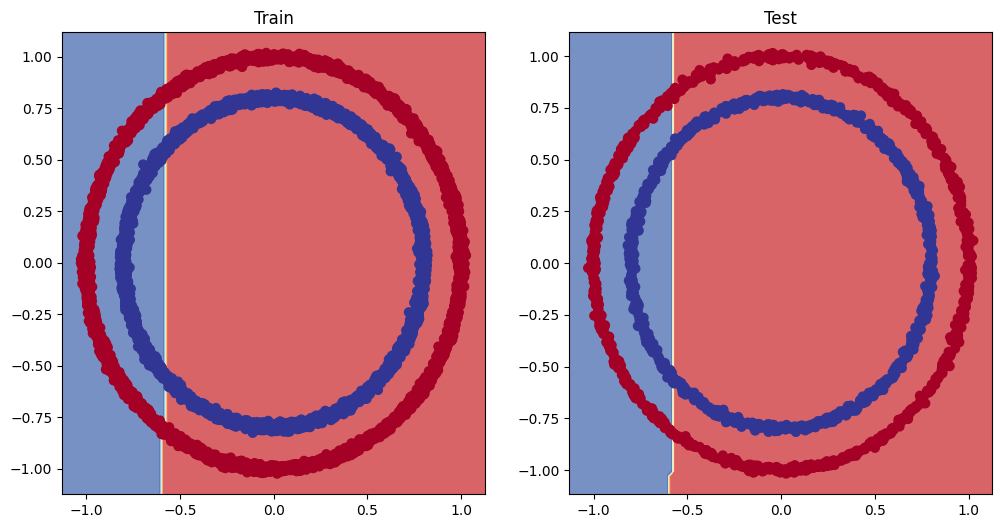

In [25]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

As I said earlier, a linear model would not be able to learn this distribution, no matter how many epochs you run, or how many hidden neurons you have, it won't be able to do that

### **The missing piece: Non-Linearity**

Now, our model can draw straight lines, but we have to make it work with something that is non-linear, (circle in this case). So we make use of **non-linear activation function**

`ReLU` : Rectified Linear Unit `torch.nn.ReLU()`



In [26]:
class CircleModelv1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=12)
    self.layer_2 = nn.Linear(in_features=12, out_features=12)
    self.layer_3 = nn.Linear(in_features=12, out_features=1)
    self.relu = nn.ReLU() # here we are suing ReLU activation function



  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_2 = CircleModelv1().to(device)
print(model_2)

CircleModelv1(
  (layer_1): Linear(in_features=2, out_features=12, bias=True)
  (layer_2): Linear(in_features=12, out_features=12, bias=True)
  (layer_3): Linear(in_features=12, out_features=1, bias=True)
  (relu): ReLU()
)


In [27]:
# Setup loss and optimizer
loss_func = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.2)

Now train:

In [28]:
torch.manual_seed(135)
epochs = 1000


# put the data on the device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# now the trainig and evaluation loop

for epoch in range(epochs):

  ## training
  model_2.train()

  # now the forward pass
  y_logits = model_2(X_train).squeeze() # squeezing remov extra 1 in dimension
  y_pred = torch.round(torch.sigmoid(y_logits))

  # now the loss
  loss = loss_func(y_logits, y_train)
  acc = accuracy_func(y_train, y_pred)



  # optimzer zero grad
  optimizer.zero_grad()


  # backward loss

  loss.backward()


  # optimzier step
  optimizer.step()



  # testing

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # loss and accuracy
    test_loss = loss_func(test_logits, y_test)
    test_acc = accuracy_func(y_test, test_pred)



  # print what's happenin at every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71135 | Accuracy: 50.29% | Test Loss: 0.71382 | Test Accuracy: 48.85%
Epoch: 10 | Loss: 0.69639 | Accuracy: 50.29% | Test Loss: 0.69837 | Test Accuracy: 48.85%
Epoch: 20 | Loss: 0.69335 | Accuracy: 50.29% | Test Loss: 0.69455 | Test Accuracy: 48.85%
Epoch: 30 | Loss: 0.69250 | Accuracy: 50.29% | Test Loss: 0.69325 | Test Accuracy: 48.85%
Epoch: 40 | Loss: 0.69206 | Accuracy: 49.62% | Test Loss: 0.69258 | Test Accuracy: 50.05%
Epoch: 50 | Loss: 0.69171 | Accuracy: 50.10% | Test Loss: 0.69211 | Test Accuracy: 50.40%
Epoch: 60 | Loss: 0.69136 | Accuracy: 50.06% | Test Loss: 0.69170 | Test Accuracy: 50.45%
Epoch: 70 | Loss: 0.69101 | Accuracy: 50.10% | Test Loss: 0.69131 | Test Accuracy: 50.60%
Epoch: 80 | Loss: 0.69065 | Accuracy: 50.39% | Test Loss: 0.69092 | Test Accuracy: 50.80%
Epoch: 90 | Loss: 0.69030 | Accuracy: 50.56% | Test Loss: 0.69055 | Test Accuracy: 50.80%
Epoch: 100 | Loss: 0.68996 | Accuracy: 50.71% | Test Loss: 0.69019 | Test Accuracy: 50.80%
Epoch: 110

In [29]:
# Make predictions
model_2.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([0., 1., 0., 1., 1., 0., 1., 1., 1., 0.], device='cuda:0'),
 tensor([0., 0., 1., 0., 0., 1., 1., 0., 0., 0.]))

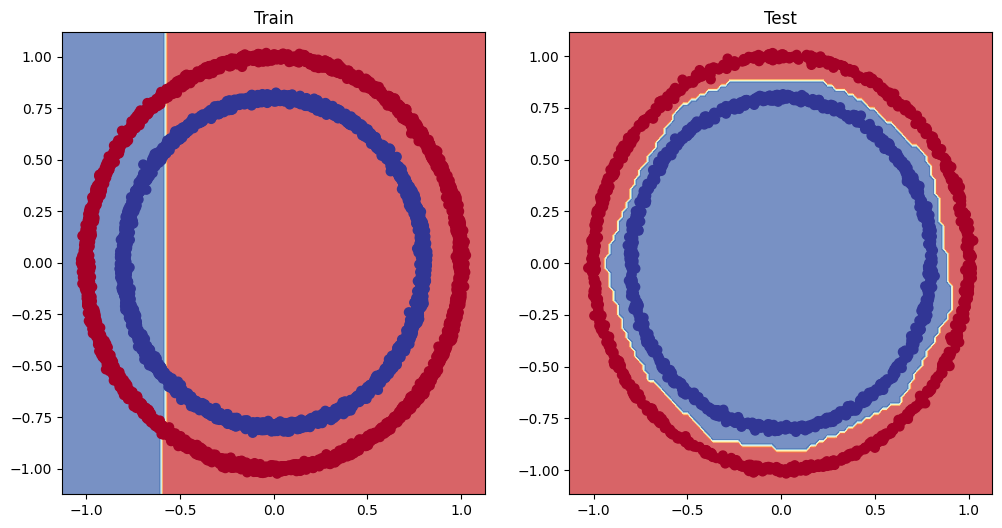

In [30]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test) # model_3 = has non-linearity

**Perfecto**

#### Replicating non-linear activation functions

So adding a non-linear activation function to the model, helped us model non-linear data.

But what does it look like?

In [31]:
# toy data
A = torch.arange(-10, 10, 0.1, dtype = torch.float32)
A

tensor([-1.0000e+01, -9.9000e+00, -9.8000e+00, -9.7000e+00, -9.6000e+00,
        -9.5000e+00, -9.4000e+00, -9.3000e+00, -9.2000e+00, -9.1000e+00,
        -9.0000e+00, -8.9000e+00, -8.8000e+00, -8.7000e+00, -8.6000e+00,
        -8.5000e+00, -8.4000e+00, -8.3000e+00, -8.2000e+00, -8.1000e+00,
        -8.0000e+00, -7.9000e+00, -7.8000e+00, -7.7000e+00, -7.6000e+00,
        -7.5000e+00, -7.4000e+00, -7.3000e+00, -7.2000e+00, -7.1000e+00,
        -7.0000e+00, -6.9000e+00, -6.8000e+00, -6.7000e+00, -6.6000e+00,
        -6.5000e+00, -6.4000e+00, -6.3000e+00, -6.2000e+00, -6.1000e+00,
        -6.0000e+00, -5.9000e+00, -5.8000e+00, -5.7000e+00, -5.6000e+00,
        -5.5000e+00, -5.4000e+00, -5.3000e+00, -5.2000e+00, -5.1000e+00,
        -5.0000e+00, -4.9000e+00, -4.8000e+00, -4.7000e+00, -4.6000e+00,
        -4.5000e+00, -4.4000e+00, -4.3000e+00, -4.2000e+00, -4.1000e+00,
        -4.0000e+00, -3.9000e+00, -3.8000e+00, -3.7000e+00, -3.6000e+00,
        -3.5000e+00, -3.4000e+00, -3.3000e+00, -3.2

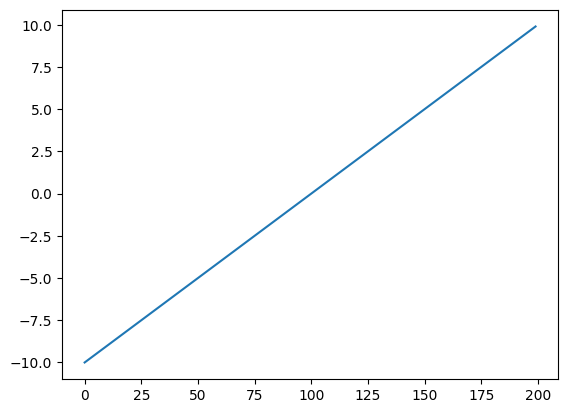

In [32]:
# plot it
plt.plot(A)

It is a nice straight line, now let's see how does `ReLU` influences it

In [33]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000,
        0.8000, 0.9000, 1.0000, 1.1000, 

All negative values will be zero, and the positive values will be left as it is

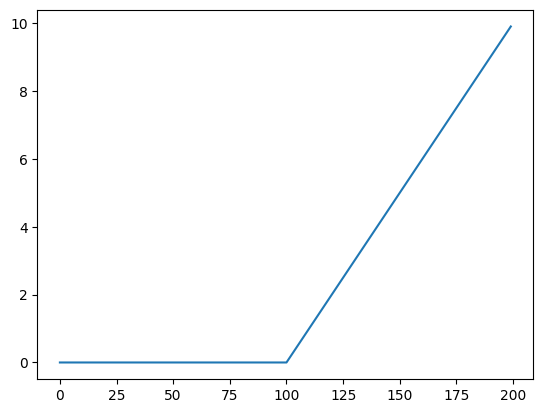

In [34]:
plt.plot(relu(A))

Let's see how does `sigmoid` function looks like?

In [35]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))


sigmoid(A)

tensor([4.5398e-05, 5.0172e-05, 5.5449e-05, 6.1280e-05, 6.7724e-05, 7.4846e-05,
        8.2717e-05, 9.1416e-05, 1.0103e-04, 1.1165e-04, 1.2339e-04, 1.3637e-04,
        1.5071e-04, 1.6656e-04, 1.8407e-04, 2.0343e-04, 2.2482e-04, 2.4846e-04,
        2.7458e-04, 3.0345e-04, 3.3535e-04, 3.7061e-04, 4.0957e-04, 4.5262e-04,
        5.0020e-04, 5.5278e-04, 6.1088e-04, 6.7508e-04, 7.4603e-04, 8.2442e-04,
        9.1105e-04, 1.0068e-03, 1.1125e-03, 1.2294e-03, 1.3585e-03, 1.5012e-03,
        1.6588e-03, 1.8329e-03, 2.0253e-03, 2.2378e-03, 2.4726e-03, 2.7320e-03,
        3.0184e-03, 3.3348e-03, 3.6842e-03, 4.0701e-03, 4.4963e-03, 4.9668e-03,
        5.4863e-03, 6.0598e-03, 6.6929e-03, 7.3915e-03, 8.1626e-03, 9.0133e-03,
        9.9518e-03, 1.0987e-02, 1.2128e-02, 1.3387e-02, 1.4774e-02, 1.6302e-02,
        1.7986e-02, 1.9840e-02, 2.1881e-02, 2.4127e-02, 2.6597e-02, 2.9312e-02,
        3.2295e-02, 3.5571e-02, 3.9166e-02, 4.3107e-02, 4.7426e-02, 5.2154e-02,
        5.7324e-02, 6.2973e-02, 6.9138e-

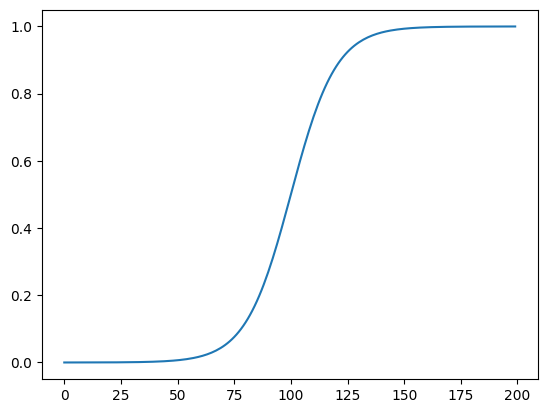

In [36]:
plt.plot(sigmoid(A))

We have many other activation functions as well.

### **Multi Class PyTorch Model**

Let's build a multi class classification model

#### Creating multi-class classification data



We will make use of Scikit-Learn's `make_blobs()` method. This method will create however many classes we want.

1. Create some multi class data with `make_blobs()`
2. Turn the data into tensors
3. Splot the data into training and testing using `train_test_split()`
4. Visualize

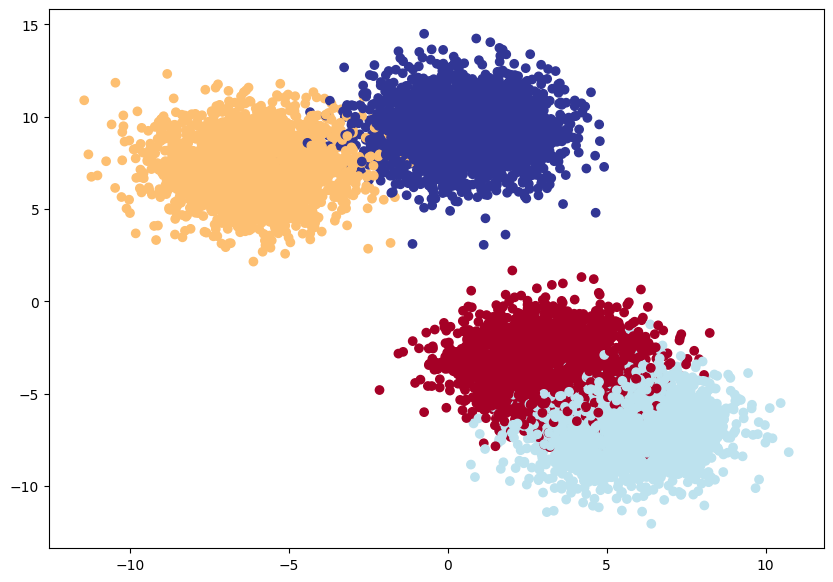

In [37]:
from sklearn.datasets import make_blobs


NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 135



# create the data

X_blob, y_blob = make_blobs(n_samples=10000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# make them into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

# visualize
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap = plt.cm.RdYlBu)

### **Multi Class Classification model in PyTorch**

Again, we start with `nn.Module` that takes in three hyperparameters:

- `input_features` - the number of `X` features coming into the model
- `output_features` - the ideal number of output features we'd like
- `hidden_units` - the number of hidden neurons we'd like hidden layers to use

In [38]:
class BlobModelv1(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),

        nn.Linear(in_features=hidden_units, out_features=hidden_units),

        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


torch.manual_seed(RANDOM_SEED)


model_3 = BlobModelv1(input_features=NUM_FEATURES, output_features=NUM_CLASSES, hidden_units=8).to(device)
model_3



BlobModelv1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

#### Making the loss function and optimizer

In [39]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

#### Getting Prediction Probabilities for multi-class PyTorch model

In [40]:
# a single forward pass

model_3(X_blob_test.to(device))[:10]

tensor([[-0.3384,  3.2482,  2.2383,  0.8825],
        [ 0.1898, -2.5342, -2.9046, -1.4519],
        [-0.1116,  2.7522,  2.1586,  0.8391],
        [ 0.2512,  2.6086,  2.7274,  1.0833],
        [ 0.2195, -0.6709, -0.8493, -0.5270],
        [ 0.1578, -0.9231, -1.2422, -0.7020],
        [ 0.2586, -1.5697, -1.7342, -0.9269],
        [ 0.3049, -2.0266, -2.1316, -1.1075],
        [ 0.1091, -2.4638, -2.9899, -1.4877],
        [ 0.0064, -1.5988, -2.2677, -1.1589]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [41]:
# let's see the shape

model_3(X_blob_test.to(device)).shape, NUM_CLASSES

(torch.Size([2000, 4]), 4)

So our model is predicting one value for each class that we have

Now, we want to make these logits to prediction probabilities to prediciton labels, using `softmax`

In [42]:
y_logits = model_3(X_blob_test.to(device))
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:10])
print(y_pred_probs[:10])

tensor([[-0.3384,  3.2482,  2.2383,  0.8825],
        [ 0.1898, -2.5342, -2.9046, -1.4519],
        [-0.1116,  2.7522,  2.1586,  0.8391],
        [ 0.2512,  2.6086,  2.7274,  1.0833],
        [ 0.2195, -0.6709, -0.8493, -0.5270],
        [ 0.1578, -0.9231, -1.2422, -0.7020],
        [ 0.2586, -1.5697, -1.7342, -0.9269],
        [ 0.3049, -2.0266, -2.1316, -1.1075],
        [ 0.1091, -2.4638, -2.9899, -1.4877],
        [ 0.0064, -1.5988, -2.2677, -1.1589]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.0186, 0.6730, 0.2451, 0.0632],
        [0.7665, 0.0503, 0.0347, 0.1484],
        [0.0325, 0.5692, 0.3144, 0.0840],
        [0.0388, 0.4101, 0.4618, 0.0892],
        [0.4488, 0.1843, 0.1541, 0.2128],
        [0.4977, 0.1689, 0.1227, 0.2107],
        [0.6240, 0.1003, 0.0851, 0.1907],
        [0.7002, 0.0680, 0.0612, 0.1705],
        [0.7553, 0.0576, 0.0341, 0.1530],
        [0.6190, 0.1243, 0.0637, 0.1930]], device='cuda:0',
       grad_fn=<SliceBackward0>)


Now, each individual sample adds to one

In [43]:
#  y_pred_probs, each individual sample adds to 1
torch.sum(y_pred_probs[0])



tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

So these prediciton probabilites are saying that how much the model thinks the target `X` maps to each class, the highest value is the class the model thinks the specific data most belongs to

In [44]:
print(y_pred_probs[0])

print(torch.argmax(y_pred_probs[0]))

tensor([0.0186, 0.6730, 0.2451, 0.0632], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(1, device='cuda:0')


So the model thinks, it belong to class 5

### **Training and Testing Loop**

In [45]:
torch.manual_seed(RANDOM_SEED)
epochs = 1000


# put the data to device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)



for epoch in range(epochs):

  model_3.train()


  # forward pass
  y_logits = model_3(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)



  # calculate loss and accuracy
  loss = loss_func(y_logits, y_blob_train)
  acc = accuracy_func(y_blob_train, y_pred)


  # optimizer zero grad
  optimizer.zero_grad()


  # loss backward
  loss.backward()



  # optimizer step
  optimizer.step()


  # testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_blob_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # test loss and accuracy
    test_loss = loss_func(test_logits, y_blob_test)
    test_acc = accuracy_func(y_blob_test, test_pred)


    # print
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.78937 | Accuracy: 33.02% | Test Loss: 0.82397 | Test Accuracy: 50.00%
Epoch: 10 | Loss: 0.41695 | Accuracy: 76.10% | Test Loss: 0.40285 | Test Accuracy: 76.35%
Epoch: 20 | Loss: 0.35343 | Accuracy: 79.33% | Test Loss: 0.34770 | Test Accuracy: 79.40%
Epoch: 30 | Loss: 0.32710 | Accuracy: 82.65% | Test Loss: 0.32340 | Test Accuracy: 83.15%
Epoch: 40 | Loss: 0.31780 | Accuracy: 79.45% | Test Loss: 0.32632 | Test Accuracy: 90.45%
Epoch: 50 | Loss: 0.35438 | Accuracy: 76.64% | Test Loss: 0.32745 | Test Accuracy: 87.60%
Epoch: 60 | Loss: 0.31884 | Accuracy: 79.16% | Test Loss: 0.30805 | Test Accuracy: 91.90%
Epoch: 70 | Loss: 0.31380 | Accuracy: 79.74% | Test Loss: 0.30068 | Test Accuracy: 91.35%
Epoch: 80 | Loss: 0.30374 | Accuracy: 80.77% | Test Loss: 0.29078 | Test Accuracy: 91.80%
Epoch: 90 | Loss: 0.29525 | Accuracy: 81.86% | Test Loss: 0.28218 | Test Accuracy: 91.95%
Epoch: 100 | Loss: 0.28767 | Accuracy: 82.62% | Test Loss: 0.27413 | Test Accuracy: 92.20%
Epoch: 110

### Evaluation Predictions

In [46]:
model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_blob_test)


# view few
y_logits[:10]

tensor([[ 6.4993e+00,  1.0881e+01, -2.1785e+01,  1.7960e+01],
        [ 5.6705e+00, -1.5487e+01,  1.2036e+01, -8.3603e+00],
        [ 6.3978e+00,  1.2528e+01, -1.9928e+01,  1.3847e+01],
        [ 6.3184e+00,  1.9406e+01, -2.1102e+01,  9.6163e+00],
        [ 5.9040e+00, -2.6852e+00, -1.2968e-02, -1.9229e+00],
        [ 5.8821e+00, -5.6589e+00,  1.9496e+00, -2.2049e+00],
        [ 5.7824e+00, -7.7084e+00,  5.4913e+00, -5.5752e+00],
        [ 5.7162e+00, -9.6950e+00,  8.1377e+00, -7.7009e+00],
        [ 5.6931e+00, -1.6765e+01,  1.2052e+01, -7.2802e+00],
        [ 5.8211e+00, -1.3330e+01,  7.1287e+00, -3.1012e+00]], device='cuda:0')

In [47]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([3, 2, 3, 1, 0, 0, 0, 2, 2, 2], device='cuda:0')
Labels: tensor([3, 2, 3, 1, 0, 0, 2, 2, 2, 2], device='cuda:0')
Test accuracy: 95.15%


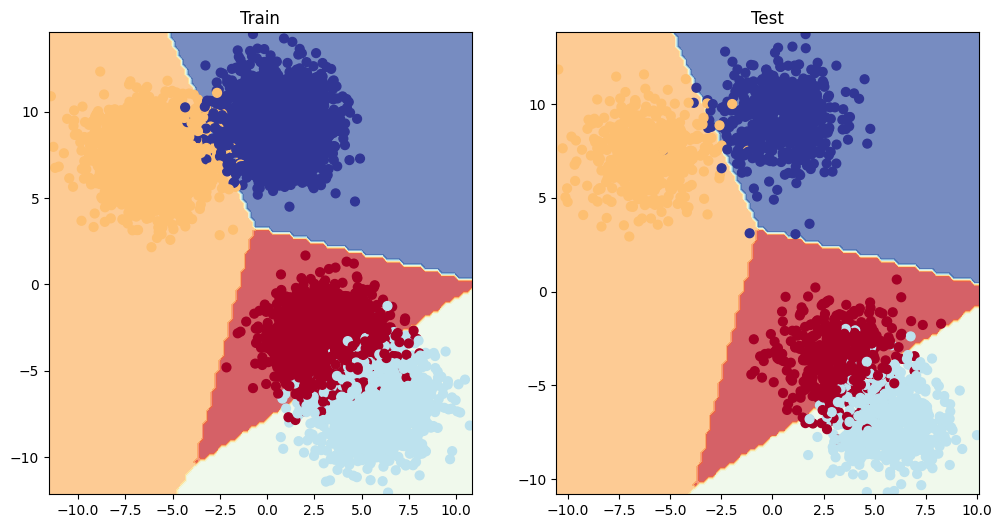

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_blob_test, y_blob_test)